##  Grocery Market Basket Transactions with Apriori Algorithm

Retail businesses, particularly grocery stores, face challenges in understanding customer purchase patterns from transactional data. By identifying frequent item combinations and association rules between products, businesses can:

Optimize product placement and bundling strategies.
Increase cross-selling opportunities.
Personalize promotions based on customer preferences.
To address these challenges, the Apriori algorithm is employed to analyze a dataset of grocery transactions, with the objective of identifying frequently bought together products and the strength of their associations.

In [33]:
# !pip install mlxtend

In [34]:
# !pip3 install networkx

#### Import required packages

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings

# Suppress warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#### Importing groceries file from folder

In [66]:
data = pd.read_csv('/kaggle/input/grocery-market-basket-transactions/groceries.csv')
df = data.copy()
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [67]:
df.shape

(700, 1)

In [68]:
df.dtypes

Items    object
dtype: object

In [69]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Items    0
dtype: int64


#### Making sure all items in lower case

In [71]:
df['Items'] = df['Items'].str.lower()

In [72]:
df.head()

,Items
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese ,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


### Converting into List


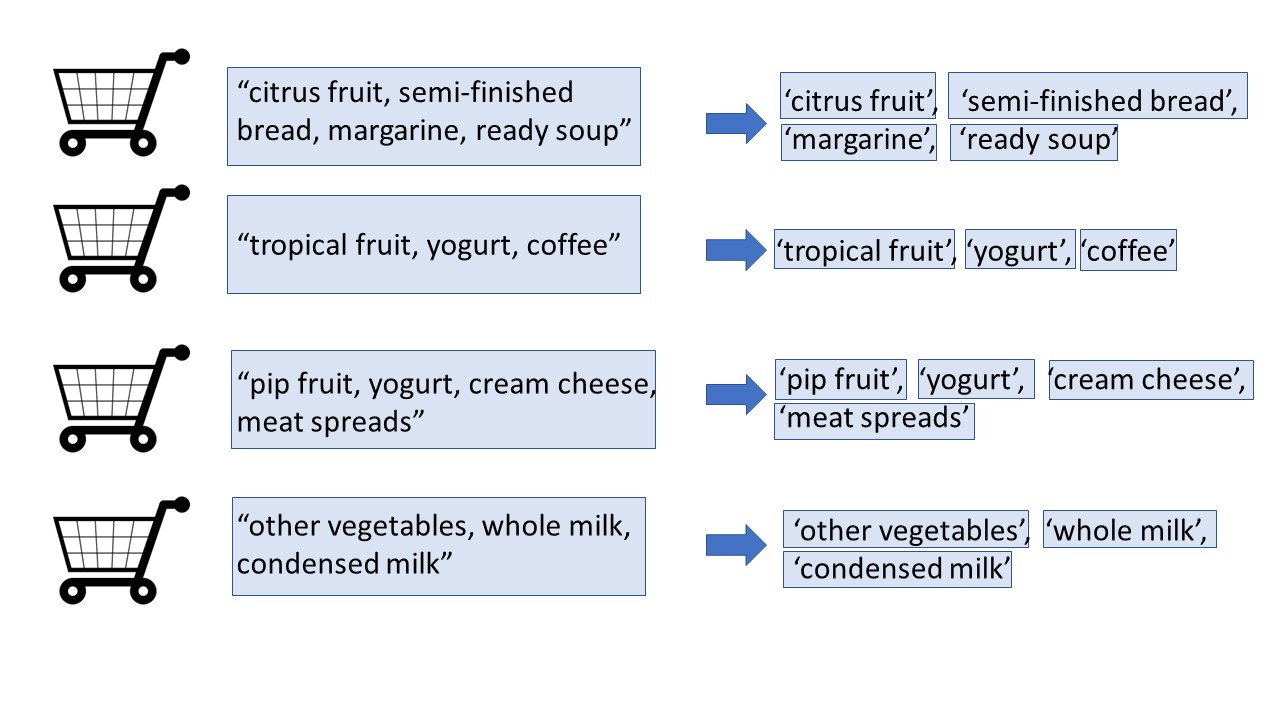

- CONVERTING TO ARRAY FOR DOING ONE - HOT ENCODING

This applies the split method on each string in the 'Items' column, splitting each string into a list of items wherever a comma (,) is found

In [73]:
#CONVERTING TO ARRAY FOR DOING ONE - HOT ENCODING
items = df['Items'].str.split(',').values 
type(items)

numpy.ndarray

In [75]:
items.shape

(700,)

Using items.tolist() effectively converts the NumPy array into a more Pythonic data structure (a list of lists), which can be easier to work with in standard Python code. Each sublist represents the individual items from each transaction, allowing for further processing or analysis.

In [76]:
items.tolist()

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [43]:
items = items.tolist()
type(items)
items

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'uht-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

### Applying Transaction Encoding for Apriori Algorithm

To apply the Apriori algorithm, we need to represent the transactional data in a format that allows the algorithm to efficiently identify frequent itemsets. This is typically done through one-hot encoding, which transforms the dataset into a binary matrix where each row represents a transaction and each column represents an item. The value 1 indicates that the item was present in the transaction, while 0 indicates its absence.

<img src="https://i.imgur.com/mtimFxh.png" width=500, height=400>

- TransactionEncoder: 

The TransactionEncoder from mlxtend is used to perform the one-hot encoding, converting the list of transactions into a binary matrix.

The TransactionEncoder is a powerful tool from the mlxtend library, specifically designed for preparing transactional data for association rule mining tasks like those performed with the Apriori algorithm

In [79]:
# For One-Hot encoding
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit_transform(items)
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False,  True, False]])

In [80]:
len(te.columns_)

152

152 make a columns 

- make new  dataset

In [81]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,abrasive cleaner,artif. sweetener,baby cosmetics,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,...,turkey,uht-milk,vinegar,waffles,whipped/sour cream,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [82]:
df.shape

(700, 152)

- rows   = 700
- column = 152

In [83]:
df.dtypes

abrasive cleaner    bool
artif. sweetener    bool
baby cosmetics      bool
baking powder       bool
bathroom cleaner    bool
                    ... 
white bread         bool
white wine          bool
whole milk          bool
yogurt              bool
zwieback            bool
Length: 152, dtype: object

### Applying Apriori algorithm

Applying Apriopri algorithm with minimum support 1%

The Apriori algorithm is a widely used method in market basket analysis to mine frequent itemsets and generate association rules. It is especially useful in discovering relationships between items in large datasets, such as finding products that are frequently bought together in retail stores

#### Support 

Support is a key metric in the Apriori algorithm that measures how frequently an itemset appears in the dataset. It helps identify which itemsets are common or frequent, making it a fundamental concept in association rule mining.

### Interpretation of Support

- High Support: 

Indicates that the itemset appears frequently in the dataset. A high support value means that the itemset is common among transactions, suggesting that it may represent a significant pattern in customer behavior.

- Low Support: 

Suggests that the itemset occurs infrequently. Low support values may indicate that the itemset is rare and may not be as relevant for generating actionable insights.

- Threshold for Filtering: 

Support is often used as a threshold to filter out itemsets that do not meet a predefined minimum support level. This helps in focusing on more relevant and frequent itemsets, improving the efficiency of the mining process.

In [84]:
# For Apriori Algorithm
from mlxtend.frequent_patterns import apriori
#intialize apriori algorithms 
frequent_itemsets = apriori(df, min_support=0.010, use_colnames=True)
print(frequent_itemsets)

      support                                       itemsets
0    0.011429                                (baking powder)
1    0.060000                                         (beef)
2    0.040000                                      (berries)
3    0.031429                                    (beverages)
4    0.064286                                 (bottled beer)
..        ...                                            ...
309  0.012857  (tropical fruit, root vegetables, whole milk)
310  0.010000          (whole milk, root vegetables, yogurt)
311  0.011429                  (yogurt, sausage, whole milk)
312  0.011429                     (yogurt, soda, whole milk)
313  0.012857           (yogurt, tropical fruit, whole milk)

[314 rows x 2 columns]


<Figure size 1000x600 with 0 Axes>

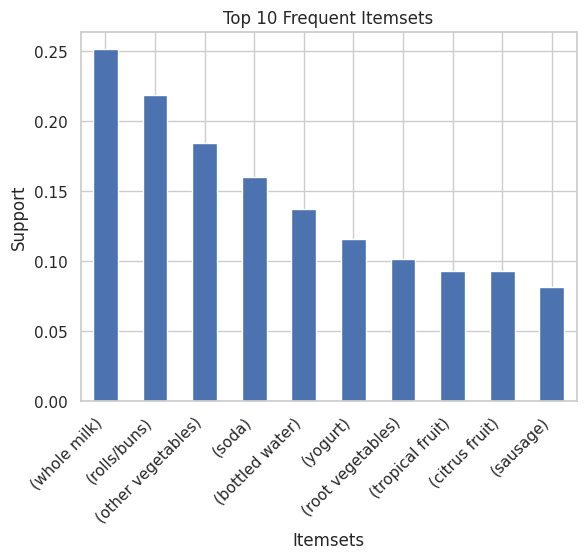

In [97]:
# Visualization 1: Bar Plot of Frequent Itemsets
plt.figure(figsize=(10, 6))
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets.sort_values('support', ascending=False).head(10).plot(kind='bar', x='itemsets', y='support', legend=False)
plt.title('Top 10 Frequent Itemsets')
plt.xlabel('Itemsets')
plt.ylabel('Support')
plt.xticks(rotation=45, ha='right')
plt.show()

#### Generate Association Rules

Using the frequent itemsets, we can now generate the association rules. We'll filter the rules based on the confidence metric.

#### confidence

Confidence is a key metric used in the Apriori algorithm to measure the reliability of an association rule. It indicates how often the rule has been found to be true in the dataset. Specifically, confidence measures the likelihood that a transaction containing itemset
X also contains itemset 𝑌 . when the rule is represented as 
X→Y.

### Interpretation of Confidence

- High Confidence: 

Indicates a strong association between X and Y. A high confidence value suggests that when X occurs, Y is likely to occur as well.This implies a reliable rule that can be utilized for recommendations or insights.

- Low Confidence: 

Suggests a weak association between X and Y. A low confidence value indicates that 
Y does not frequently occur when X is present, signaling that the rule may not be very useful or reliable .

- Threshold for Filtering: 

Confidence is often used in conjunction with support to filter out less significant rules. Analysts can set a minimum confidence level to focus on more reliable associations.

Making rules using at least 50% confidence

In [85]:
# For Association Rules
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

#This line displays the first 50 rows of the generated rules, 
#allowing you to examine the resulting association rules and their associated metrics.
rules.head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cereals),(whole milk),0.011429,0.251429,0.010000,0.875000,3.480114,0.007127,5.988571,0.720892
1,(frankfurter),(rolls/buns),0.068571,0.218571,0.034286,0.500000,2.287582,0.019298,1.562857,0.604294
2,(frozen dessert),(whole milk),0.014286,0.251429,0.011429,0.800000,3.181818,0.007837,3.742857,0.695652
3,(ham),(whole milk),0.022857,0.251429,0.014286,0.625000,2.485795,0.008539,1.996190,0.611696
4,(margarine),(whole milk),0.051429,0.251429,0.025714,0.500000,1.988636,0.012784,1.497143,0.524096
5,(pip fruit),(whole milk),0.045714,0.251429,0.022857,0.500000,1.988636,0.011363,1.497143,0.520958
6,(sliced cheese),(rolls/buns),0.024286,0.218571,0.014286,0.588235,2.691273,0.008978,1.897755,0.644070
7,(waffles),(whole milk),0.025714,0.251429,0.012857,0.500000,1.988636,0.006392,1.497143,0.510264
8,"(yogurt, curd)",(whole milk),0.024286,0.251429,0.014286,0.588235,2.339572,0.008180,1.817959,0.586823
9,"(whole milk, frankfurter)",(rolls/buns),0.021429,0.218571,0.011429,0.533333,2.440087,0.006745,1.674490,0.603102


#### Interpretation of Results


- Interpretation of Results

You can interpret the results by looking at the rules generated and their metrics:

**Antecedents**:   The items on the left-hand side of the rule.


**Consequents**:   The items on the right-hand side of the rule.


**Support**:       The frequency with which the antecedent and consequent appear together.


**Confidence**:    The likelihood that the consequent is bought when the antecedent is bought.


**Lift**:          How much more likely the consequent is to be bought when the antecedent is bought compared to its general purchase rate

#### Interpretation of Lift

- Lift > 1:

Indicates a positive association between X and Y.This means that the occurrence of 
X increases the likelihood of Y occurring.

- Lift = 1: 

Suggests that X and Y are independent. The occurrence of X does not affect the likelihood of Y.

- Lift < 1: 

Indicates a negative association between X and Y.This means that the occurrence of 
X decreases the likelihood of Y.

**Leverage**

Leverage is another important metric used in the context of association rule mining, particularly in the Apriori algorithm. It provides a way to measure how much more often two items (or itemsets) occur together than would be expected if they were statistically independent.

**Interpretation of Leverage**

- Postive Leverage :

If leverage is positive, it indicates that the itemsets occur together more frequently than expected. This suggests a potential association between the items.

- Zero Leverage

If leverage is zero, it implies that the occurrence of the itemsets together is exactly what would be expected if they were independent, indicating no association.

- Negative Leverage

If leverage is negative (which is rare in practice), it indicates that the itemsets occur together less frequently than expected, suggesting a possible inverse relationship.




#### Conviction
Conviction is a metric used in association rule mining to evaluate the strength of a rule by comparing the likelihood of the consequent occurring with the antecedent to the likelihood of the consequent occurring without the antecedent. It provides an alternative way to assess the quality of an association rule beyond support and confidence.


#### Interpretation of Conviction

- Conviction > 1: 

X Indicates that the occurrence of Y increases the likelihood of  occurring. This suggests a strong positive association between X and Y.

- Conviction = 1: 

Suggests that X and Y are independent; knowing X does not provide any additional information about Y.

- Conviction < 1: 

X Indicates that the occurrence of  decreases the likelihood of Y  occurring, suggesting an inverse relationship.



#### Checking comparison of Support, Confidence and Lift

In [93]:
support = rules['support'].values
support

array([0.01      , 0.03428571, 0.01142857, 0.01428571, 0.02571429,
       0.02285714, 0.01428571, 0.01285714, 0.01428571, 0.01142857,
       0.01428571, 0.01428571, 0.01285714, 0.01285714, 0.01      ,
       0.01      , 0.01      , 0.01      , 0.01428571, 0.01285714,
       0.01      , 0.01142857, 0.01285714])

In [94]:
confidence=rules.confidence.values
confidence


array([0.875     , 0.5       , 0.8       , 0.625     , 0.5       ,
       0.5       , 0.58823529, 0.5       , 0.58823529, 0.53333333,
       0.55555556, 0.83333333, 0.5       , 0.75      , 0.58333333,
       0.7       , 0.77777778, 0.5       , 0.52631579, 0.52941176,
       0.58333333, 0.53333333, 0.6       ])

In [95]:
lift=rules.lift.values
lift


array([3.48011364, 2.2875817 , 3.18181818, 2.48579545, 1.98863636,
       1.98863636, 2.69127259, 1.98863636, 2.33957219, 2.44008715,
       4.80109739, 3.31439394, 2.2875817 , 2.98295455, 3.16537468,
       2.78409091, 3.55846042, 2.2875817 , 2.40798074, 2.10561497,
       2.32007576, 2.12121212, 2.38636364])

In [96]:
conviction=rules.conviction.values
conviction


array([5.98857143, 1.56285714, 3.74285714, 1.99619048, 1.49714286,
       1.49714286, 1.8977551 , 1.49714286, 1.81795918, 1.6744898 ,
       1.98964286, 4.49142857, 1.56285714, 2.99428571, 1.95771429,
       2.4952381 , 3.51642857, 1.56285714, 1.64968254, 1.59071429,
       1.79657143, 1.60408163, 1.87142857])

####  Visualization Apriori Model Reasults

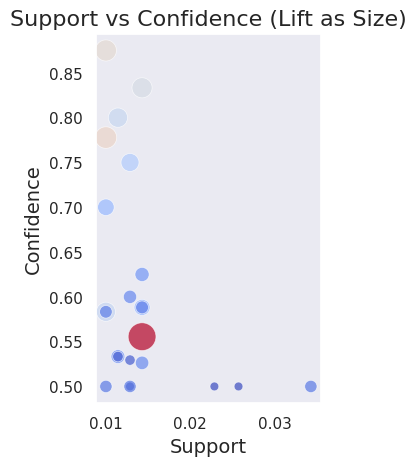

In [103]:
# Subplot 2: Scatter Plot of Support vs Confidence vs Lift
plt.subplot(1, 2, 2)
sns.scatterplot(data=rules, x='support', y='confidence', size='lift', sizes=(40, 400), hue='lift', palette='coolwarm', alpha=0.7, legend=False)
plt.title('Support vs Confidence (Lift as Size)', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Confidence', fontsize=14)
plt.grid()

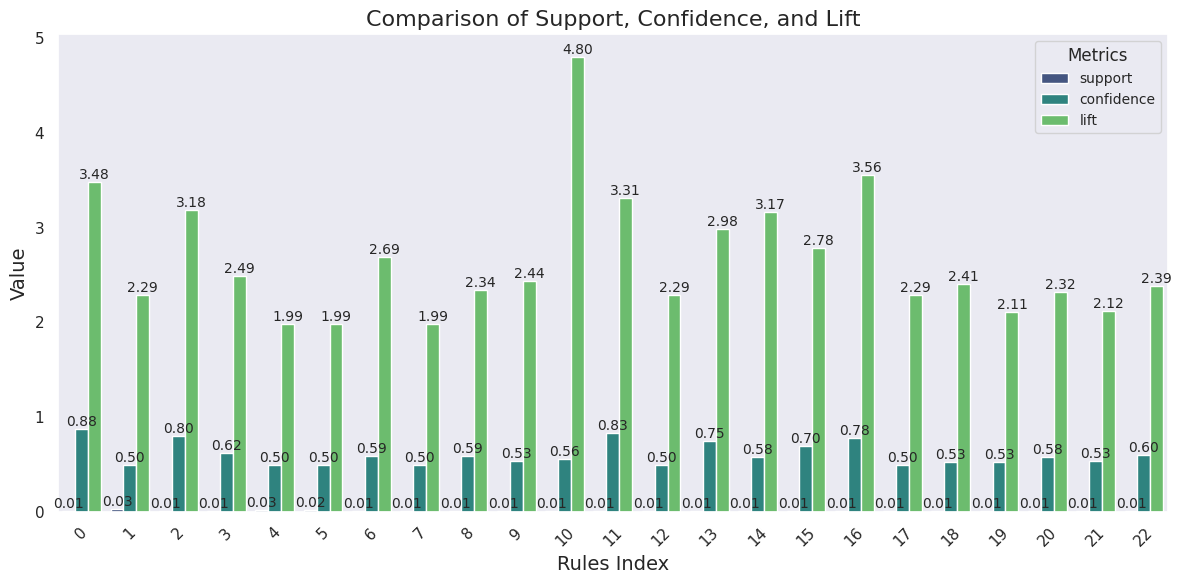

In [104]:
# Prepare data for visualization
comparison_data = rules[['support', 'confidence', 'lift']].copy()
comparison_data['rule'] = rules.index  # Add rule index for labeling

# Melt the DataFrame to have a long format suitable for seaborn
comparison_data_melted = comparison_data.melt(id_vars='rule', 
                                               value_vars=['support', 'confidence', 'lift'], 
                                               var_name='Metric', 
                                               value_name='Value')

# Plotting the comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='rule', y='Value', hue='Metric', data=comparison_data_melted, palette='viridis')

# Add annotations on the bars
for p in plt.gca().patches:
    plt.annotate(f'{p.get_height():.2f}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='bottom', fontsize=10)

# Customize the plot
plt.title('Comparison of Support, Confidence, and Lift', fontsize=16)
plt.xlabel('Rules Index', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Metrics', fontsize=10)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

### Network Graph

A network graph consists of "Node" for each event and "Edge" which defines relation which can be undirected, directed or wighted

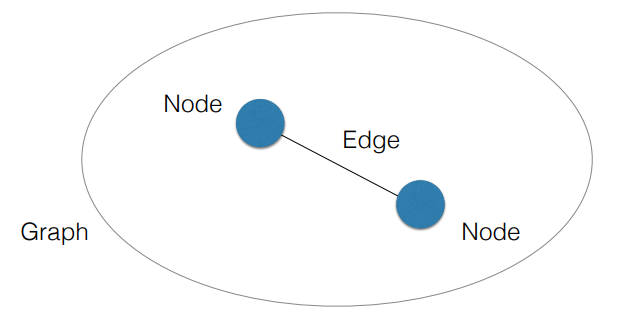

**Network Graph Types**

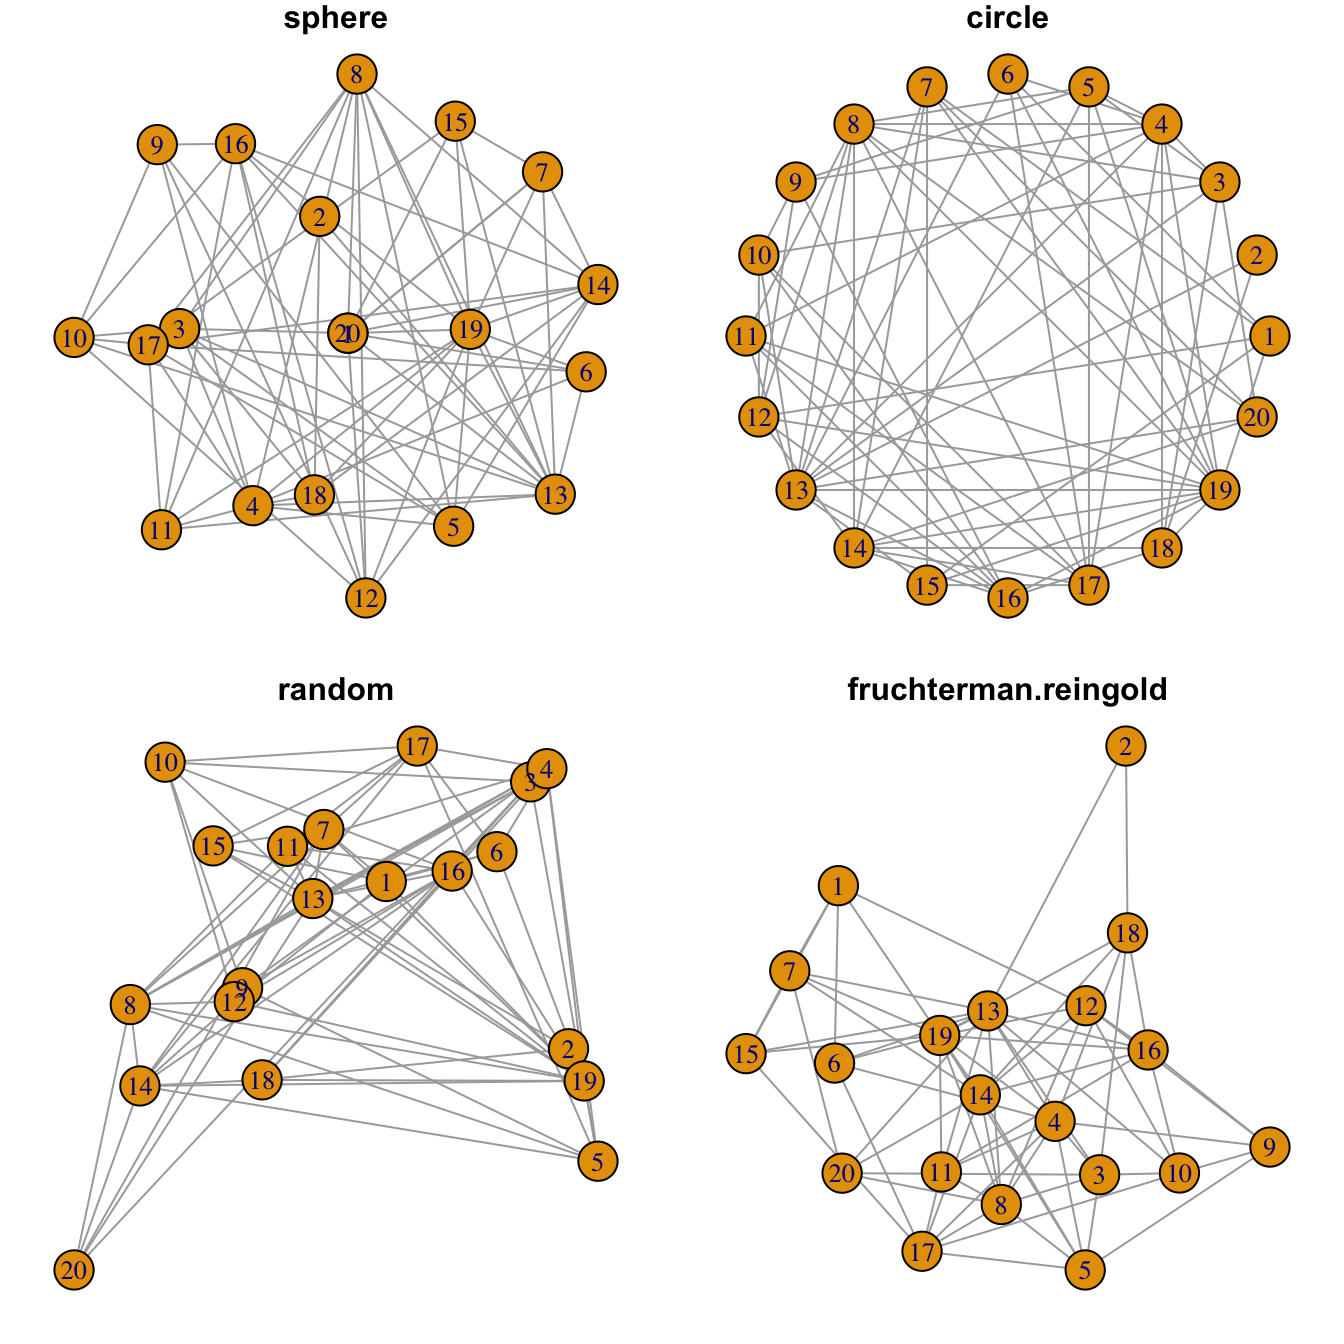

#### Plotting network graph

- Network Graph of Association Rules

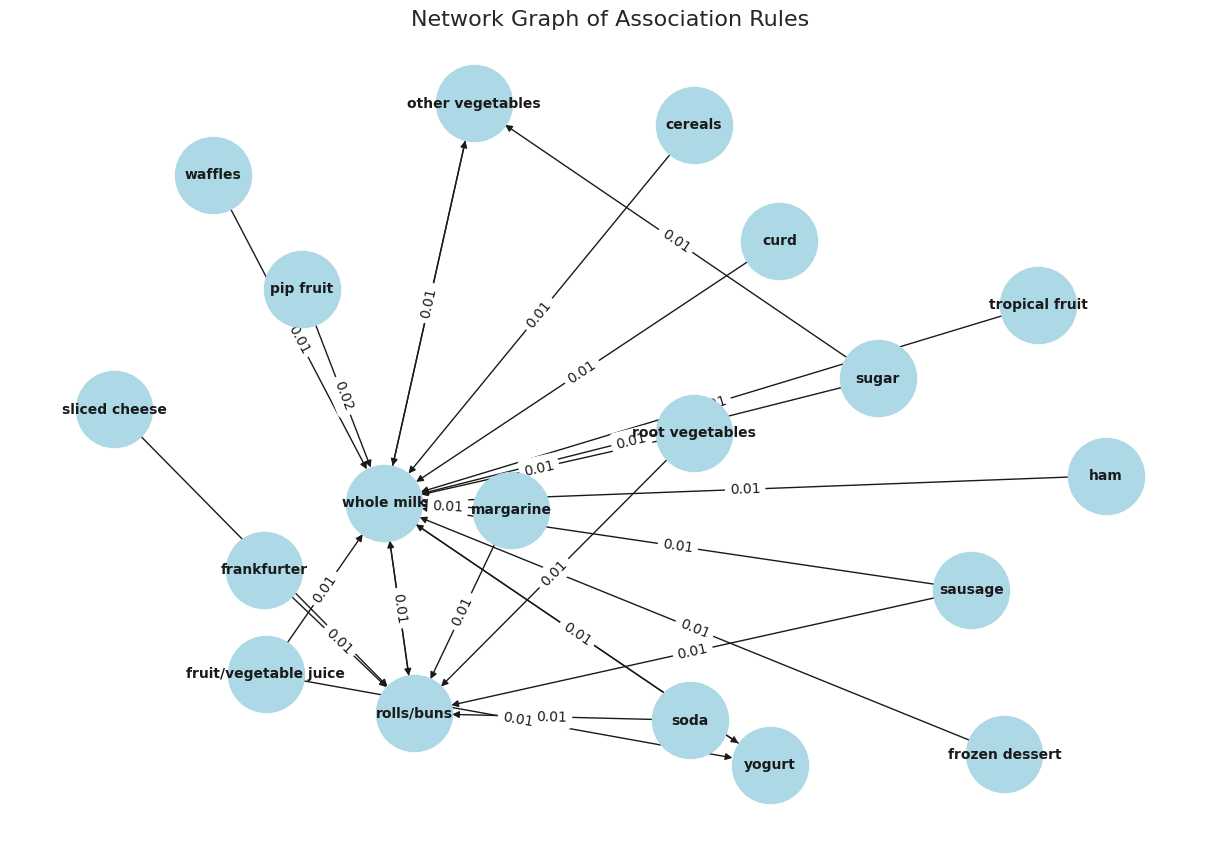

In [91]:
# Create a directed graph from the rules
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

G = nx.DiGraph()

# Add nodes and edges based on antecedents and consequents
for index, row in rules.iterrows():
    antecedents = list(row['antecedents'])
    consequents = list(row['consequents'])
    
    for antecedent in antecedents:
        for consequent in consequents:
            G.add_edge(antecedent, consequent, weight=row['support'])

# Draw the network graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', arrows=True)

# Draw edge labels (support values)
edge_labels = {(antecedent, consequent): f'{data["weight"]:.2f}' for antecedent, consequent, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Customize the plot
plt.title('Network Graph of Association Rules', fontsize=16)
plt.axis('off')  # Hide the axes
plt.show()

 ####  Access the File Path and Import Functions

The filename is 'apriori_helper.py'.   Access it to write code for some visualization functions for the Apriori algorithm, and then use the functions in this file

In [105]:
import sys
import importlib.util

# Step 1: Specify the path to the .py file
module_path = '/kaggle/input/grocery-market-basket-transactions/apriori_helper.py'

# Step 2: Load the module from the path
spec = importlib.util.spec_from_file_location("apriori_helper", module_path)
ap = importlib.util.module_from_spec(spec)
sys.modules["apriori_helper"] = ap
spec.loader.exec_module(ap)

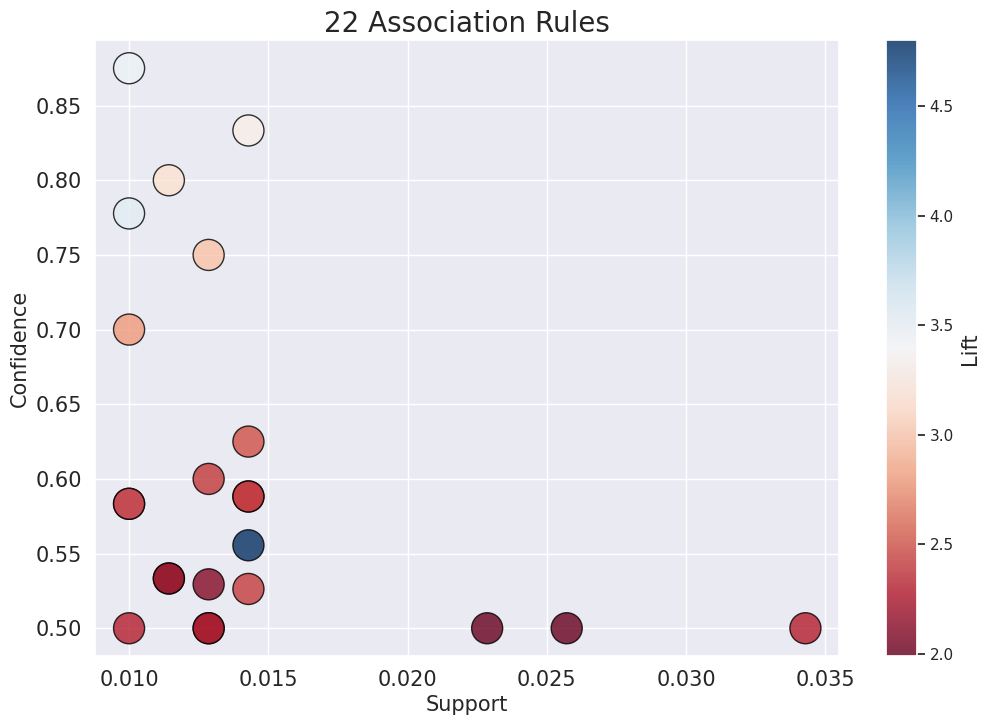

In [106]:
ap.draw_plot(support,confidence,lift)

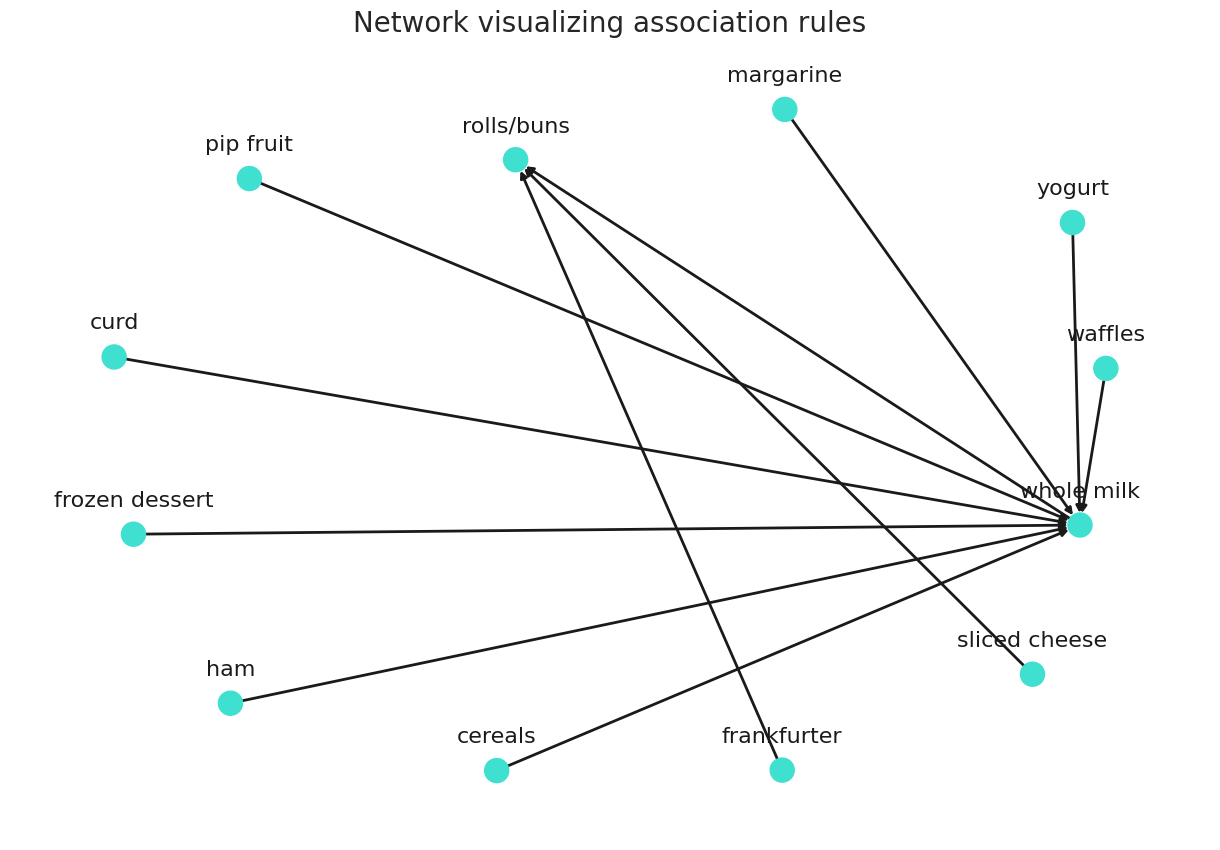

In [108]:
import networkx as nx
import apriori_helper as ap
ap.draw_graph(rules,10)

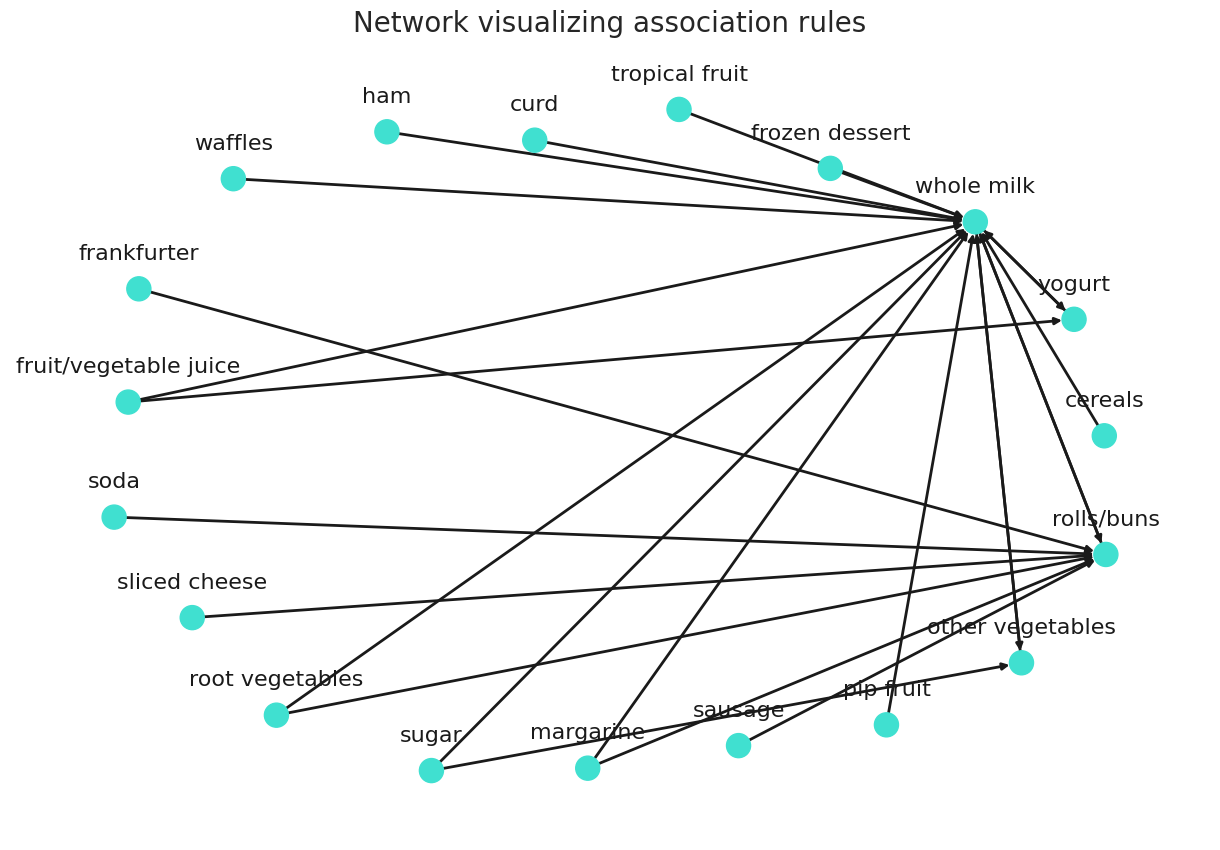

In [109]:
import networkx as nx
import apriori_helper as ap
ap.draw_graph(rules, 20)